In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds
#import pycmf


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
def load_data():
    rating = pd.read_csv('tables/ratings.csv')
    movie = pd.read_csv('tables/movies.csv')
    #df = pd.merge(rating, movie, on='movieId')
    return rating, movie

def get_matrix(rating):
    mtrx_df = rating.pivot(index = 'userId', columns ='movieId', values = 'rating')
    mtrx_np = mtrx_df.to_numpy()
    return mtrx_df, mtrx_np

def normalize_matrix(mtrx):
    ratings_mean = np.mean(mtrx, axis = 1)
    normalized_mtrx = mtrx - ratings_mean.reshape(-1, 1)
    transform_back= lambda pred : pred +  ratings_mean.reshape(-1, 1)
    return normalized_mtrx, transform_back

In [4]:
rating, movie= load_data()
mtrx_df, mtrx_np= get_matrix(rating)

#normalized_mtrx, transform_back= normalize_matrix(mtrx_np)

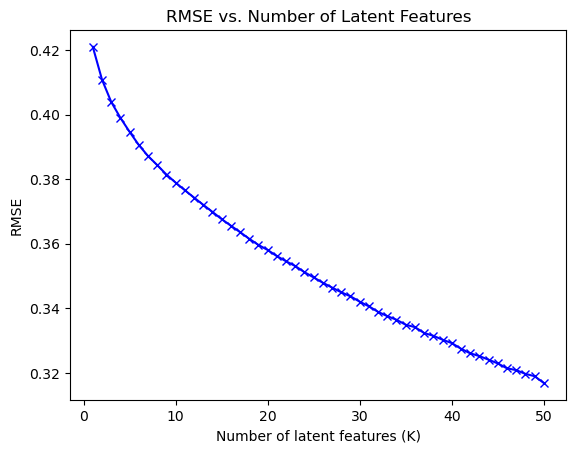

In [16]:
mtrx= (mtrx_df.fillna(0)).to_numpy()

input_mtrx= np.copy(mtrx)

# ???????
# Apply a non-negative transformation to the normalized ratings matrix
#transformed_mtrx = np.abs(normalized_mtrx)

# Calculate the NMF decomposition of the transformed ratings matrix
rmse_values = []
k_values = range(1, 51)

for k in k_values:
    #model = NMF(n_components=k, init='random', random_state=0, max_iter=1000)
    model = NMF(n_components=k, init='nndsvda', random_state=0, max_iter=1000)
    
    W = model.fit_transform(input_mtrx)
    H = model.components_
    all_predicted_ratings = np.dot(W, H) #+ ratings_mean.reshape(-1, 1)

    # Calculate the RMSE
    rmse = sqrt(mean_squared_error(mtrx, all_predicted_ratings))
    rmse_values.append(rmse)

# Plot the RMSE values for different values of K
plt.plot(k_values, rmse_values, 'bx-')
plt.xlabel('Number of latent features (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Latent Features')
plt.show()

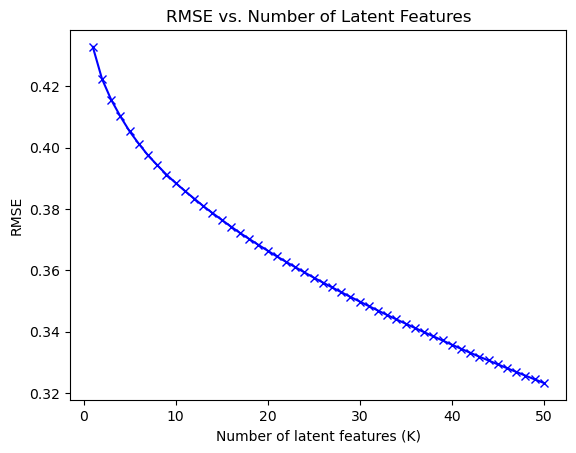

In [20]:
rmse_values=[]
k_values = range(1, 51)
for k in k_values:
    #print(k)
    U, sigma, Vt = svds(normalized_mtrx, k = k)
    sigma = np.diag(sigma)

    # Calculate the predicted ratings
    all_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

    # Extract the actual ratings from the training data
    actual_ratings = mtrx

    # Calculate the RMSE
    rmse = sqrt(mean_squared_error(actual_ratings, all_predicted_ratings))
    rmse_values.append(rmse)

# Plot the RMSE values for different values of K
plt.plot(k_values, rmse_values, 'bx-')
plt.xlabel('Number of latent features (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Latent Features')
plt.show()

In [23]:
#array=mtrx_df.to_numpy()
#np.logical_not(np.isnan(array)).sum(axis=1)>5

In [45]:
rating

userId  movieId  rating     timestamp
0            1        1     4.0  9.649827e+08
1            1        3     4.0  9.649812e+08
2            1        6     4.0  9.649822e+08
3            1       47     5.0  9.649838e+08
4            1       50     5.0  9.649829e+08
...        ...      ...     ...           ...
100888     615        5     5.0  6.592659e+09
100889     615        3     5.0  6.592659e+09
100890     615        8     5.0  6.592659e+09
100891     616        3     5.0  1.680316e+09
100892     616        1     5.0  1.680316e+09

[100893 rows x 4 columns]

In [6]:
sub_train, sub_eval= train_test_split(rating, train_size=0.9, stratify= rating["userId"])

In [7]:
#mtrx_df_train

In [8]:


mtrx_df, _ = get_matrix(rating)
mtrx_df_train= mtrx_df.copy()
eval_idx= mtrx_df.copy()
eval_idx.iloc[:,:]=False

for i in range(sub_eval.shape[0]):
    mtrx_df_train.loc[sub_eval.iloc[i, 0], sub_eval.iloc[i, 1]]= None
    eval_idx.loc[sub_eval.iloc[i, 0], sub_eval.iloc[i, 1]]= True
    
eval_idx= eval_idx.to_numpy()

In [111]:
mtrx_df_train.shape, mtrx_df_val.shape, mtrx_df.shape 

((616, 9724), (616, 9724), (616, 9724))

In [ ]:
1+1

1
3.089196712159135
3
2.94950073565597
5
2.908624442308293
7
2.910260602561573
9
2.9010696246647587
11
2.920490586919831
13
2.938748993792731
15
2.9605672474079228
17
2.970482572126118
19
2.979495525076629
21
2.973745985156958
23
2.988336424372641
25
2.991158820931818
27
3.0090322448750055
29
3.0395182795446685


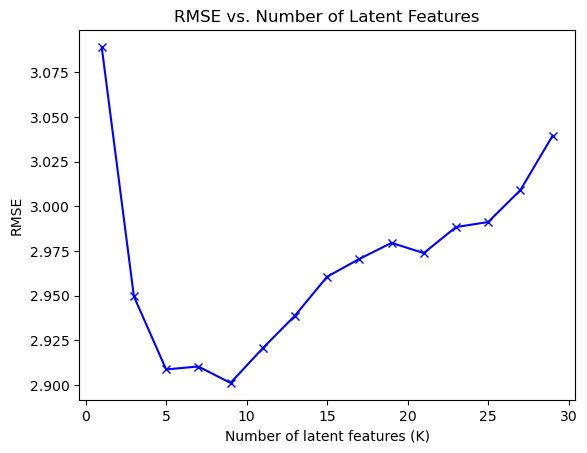

In [12]:

normalized_mtrx= (mtrx_df_train.fillna(0)).to_numpy()
mtrx_np= (mtrx_df.fillna(0)).to_numpy()



rmse_values=[]
k_values = range(1, 30,  2)
for k in k_values:
    #print(k)
    #print(rmse)

    model = NMF(n_components=k, init='nndsvda', random_state=0, max_iter=1000)
    
    W = model.fit_transform(normalized_mtrx)
    H = model.components_
    all_predicted_ratings = np.dot(W, H)
    
    
    # Calculate the RMSE
    rmse = sqrt(mean_squared_error(mtrx_np[eval_idx], all_predicted_ratings[eval_idx]))
    rmse_values.append(rmse)

# Plot the RMSE values for different values of K
plt.plot(k_values, rmse_values, 'bx-')
plt.xlabel('Number of latent features (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Latent Features')
plt.show()

/home/reda/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


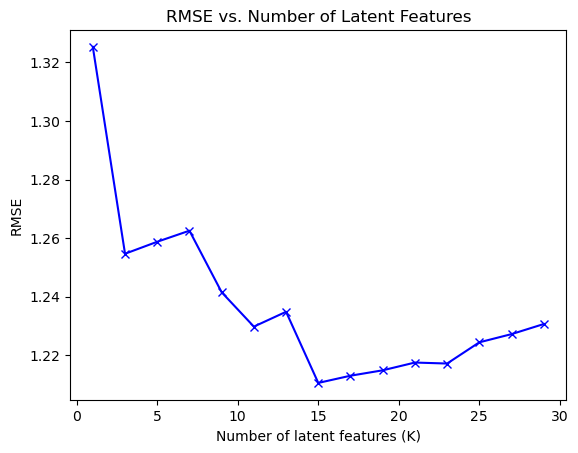

In [13]:

normalized_mtrx= (mtrx_df_train.fillna(2.5)).to_numpy()
mtrx_np= (mtrx_df.fillna(2.5)).to_numpy()



rmse_values=[]
k_values = range(1, 30,  2)
for k in k_values:
    #print(k)
    #print(rmse)

    model = NMF(n_components=k, init='nndsvda', random_state=0, max_iter=1000)
    
    W = model.fit_transform(normalized_mtrx)
    H = model.components_
    all_predicted_ratings = np.dot(W, H)
    
    
    # Calculate the RMSE
    rmse = sqrt(mean_squared_error(mtrx_np[eval_idx], all_predicted_ratings[eval_idx]))
    rmse_values.append(rmse)

# Plot the RMSE values for different values of K
plt.plot(k_values, rmse_values, 'bx-')
plt.xlabel('Number of latent features (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Latent Features')
plt.show()

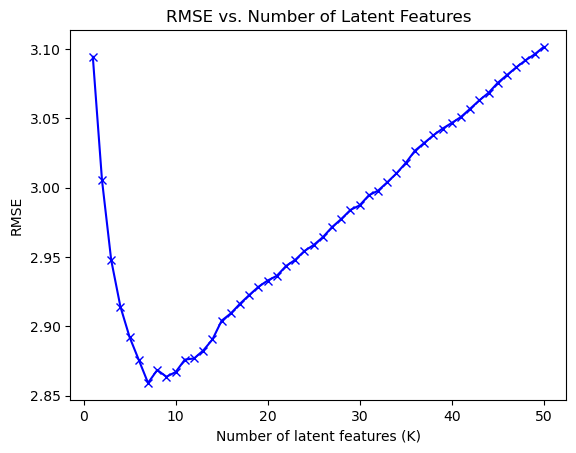

In [143]:

normalized_mtrx= (mtrx_df_train.fillna(0)).to_numpy()
mtrx_np= (mtrx_df.fillna(0)).to_numpy()



rmse_values=[]
k_values = range(1, 51)
for k in k_values:
    #print(k)
    U, sigma, Vt = svds(normalized_mtrx, k = k)
    sigma = np.diag(sigma)

    # Calculate the predicted ratings
    all_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

    # Extract the actual ratings from the training data
    actual_ratings = mtrx

    # Calculate the RMSE
    rmse = sqrt(mean_squared_error(mtrx_np[eval_idx], all_predicted_ratings[eval_idx]))
    rmse_values.append(rmse)

# Plot the RMSE values for different values of K
plt.plot(k_values, rmse_values, 'bx-')
plt.xlabel('Number of latent features (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Latent Features')
plt.show()

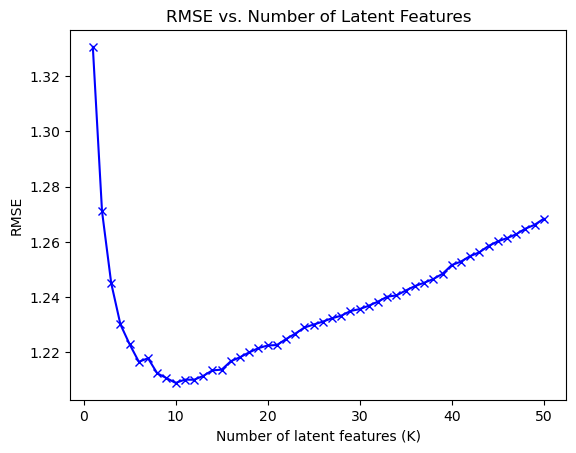

In [130]:
normalized_mtrx= (mtrx_df_train.fillna(2.5)).to_numpy()
mtrx_np= (mtrx_df.fillna(2.5)).to_numpy()



rmse_values=[]
k_values = range(1, 51)
for k in k_values:
    #print(k)
    U, sigma, Vt = svds(normalized_mtrx, k = k)
    sigma = np.diag(sigma)

    # Calculate the predicted ratings
    all_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

    # Extract the actual ratings from the training data
    actual_ratings = mtrx

    # Calculate the RMSE
    rmse = sqrt(mean_squared_error(mtrx_np[eval_idx], all_predicted_ratings[eval_idx]))
    rmse_values.append(rmse)

# Plot the RMSE values for different values of K
plt.plot(k_values, rmse_values, 'bx-')
plt.xlabel('Number of latent features (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Latent Features')
plt.show()

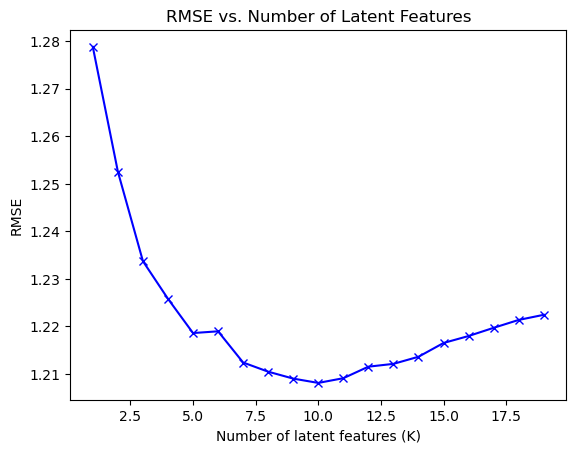

In [140]:
normalized_mtrx= (mtrx_df_train.fillna(2.5)).to_numpy()
mtrx_np= (mtrx_df.fillna(2.5)).to_numpy()

normalized_mtrx, transform_back= normalize_matrix(normalized_mtrx)



rmse_values=[]
k_values = range(1, 20)
for k in k_values:
    #print(k)
    U, sigma, Vt = svds(normalized_mtrx, k = k)
    sigma = np.diag(sigma)

    # Calculate the predicted ratings
    all_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

    # Extract the actual ratings from the training data
    actual_ratings = mtrx

    # Calculate the RMSE
    rmse = sqrt(mean_squared_error(mtrx_np[eval_idx], transform_back(all_predicted_ratings)[eval_idx]))
    rmse_values.append(rmse)

# Plot the RMSE values for different values of K
plt.plot(k_values, rmse_values, 'bx-')
plt.xlabel('Number of latent features (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Latent Features')
plt.show()

In [14]:
#! pip install git+https://github.com/gbolmier/funk-svd

  Cloning https://github.com/gbolmier/funk-svd to /tmp/pip-req-build-5itfz5uy
  Running command git clone --filter=blob:none --quiet https://github.com/gbolmier/funk-svd /tmp/pip-req-build-5itfz5uy
  Resolved https://github.com/gbolmier/funk-svd to commit fecc38ea1c2859ef6a6d9af0b7f953e1b693764e
  Preparing metadata (setup.py) ... done
  Created wheel for funk-svd: filename=funk_svd-0.0.1.dev1-py3-none-any.whl size=9037 sha256=891cda8dfba9203be71ceacbd217f794f22836f61623b30afe3aff7d66d20283
  Stored in directory: /tmp/pip-ephem-wheel-cache-7tcif2x9/wheels/c1/5f/58/0d631ca5543c40b1e044d2a48dd1a8fbb6a7c189be1141b925
Successfully built funk-svd


In [15]:
from funk_svd import SVD



In [16]:
svd = SVD(lr=0.001, reg=0.005, n_epochs=100, n_factors=15,
          early_stopping=True, shuffle=False, min_rating=1, max_rating=5)

In [ ]:
sub_train, sub_eval

In [20]:
train_df= sub_train.copy()[['userId','movieId', 'rating']]
train_df.columns = ["u_id", "i_id", "rating"]
eval_df= sub_eval.copy()[['userId','movieId', 'rating']]
eval_df.columns = ["u_id", "i_id", "rating"]

In [ ]:
svd.fit(X=train_df)
predict= svd.predict(eval_df)

In [28]:
sqrt(mean_squared_error(predict, eval_df['rating']))

0.8635777996836524

Preprocessing data...

Epoch 1/100  | took 0.0 sec
Epoch 2/100  | took 0.0 sec
Epoch 3/100  | took 0.0 sec
Epoch 4/100  | took 0.0 sec
Epoch 5/100  | took 0.0 sec
Epoch 6/100  | took 0.0 sec
Epoch 7/100  | took 0.0 sec
Epoch 8/100  | took 0.0 sec
Epoch 9/100  | took 0.0 sec
Epoch 10/100 | took 0.0 sec
Epoch 11/100 | took 0.0 sec
Epoch 12/100 | took 0.0 sec
Epoch 13/100 | took 0.0 sec
Epoch 14/100 | took 0.0 sec
Epoch 15/100 | took 0.0 sec
Epoch 16/100 | took 0.0 sec
Epoch 17/100 | took 0.0 sec
Epoch 18/100 | took 0.0 sec
Epoch 19/100 | took 0.0 sec
Epoch 20/100 | took 0.0 sec
Epoch 21/100 | took 0.0 sec
Epoch 22/100 | took 0.0 sec
Epoch 23/100 | took 0.0 sec
Epoch 24/100 | took 0.0 sec
Epoch 25/100 | took 0.0 sec
Epoch 26/100 | took 0.0 sec
Epoch 27/100 | took 0.0 sec
Epoch 28/100 | took 0.0 sec
Epoch 29/100 | took 0.0 sec
Epoch 30/100 | took 0.0 sec
Epoch 31/100 | took 0.0 sec
Epoch 32/100 | took 0.0 sec
Epoch 33/100 | took 0.0 sec
Epoch 34/100 | took 0.0 sec
Epoch 35/100 | took 0.0 s

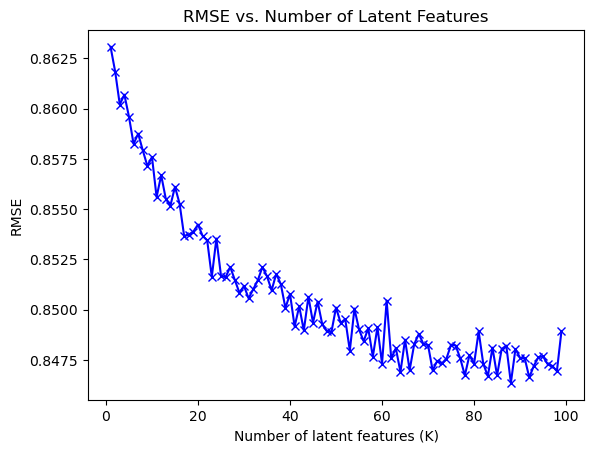

In [37]:
rmse_values=[]
k_values = range(1, 100)
for k in k_values:
    #print(k)
    iters=10
    predict= None
    for v in range(iters):

        train_df= sub_train.copy()[['userId','movieId', 'rating']]
        train_df.columns = ["u_id", "i_id", "rating"]
        eval_df= sub_eval.copy()[['userId','movieId', 'rating']]
        eval_df.columns = ["u_id", "i_id", "rating"]
        
        svd = SVD(lr=0.001, reg=0.005, n_epochs=100, n_factors=k,
            early_stopping=True, shuffle=False, min_rating=1, max_rating=5)

        svd.fit(X=train_df)
        if(predict is None):
            predict= np.array(svd.predict(eval_df))
        else:
            predict=predict+ np.array(svd.predict(eval_df))
    predict=predict/iters
    
    # Calculate the RMSE
    rmse = sqrt(mean_squared_error(predict, eval_df['rating']))
    rmse_values.append(rmse)

# Plot the RMSE values for different values of K
plt.plot(k_values, rmse_values, 'bx-')
plt.xlabel('Number of latent features (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Latent Features')
plt.show()

Preprocessing data...

Epoch 1/100  | took 0.0 sec
Epoch 2/100  | took 0.0 sec
Epoch 3/100  | took 0.0 sec
Epoch 4/100  | took 0.1 sec
Epoch 5/100  | took 0.0 sec
Epoch 6/100  | took 0.0 sec
Epoch 7/100  | took 0.0 sec
Epoch 8/100  | took 0.0 sec
Epoch 9/100  | took 0.0 sec
Epoch 10/100 | took 0.0 sec
Epoch 11/100 | took 0.0 sec
Epoch 12/100 | took 0.0 sec
Epoch 13/100 | took 0.0 sec
Epoch 14/100 | took 0.0 sec
Epoch 15/100 | took 0.0 sec
Epoch 16/100 | took 0.0 sec
Epoch 17/100 | took 0.0 sec
Epoch 18/100 | took 0.1 sec
Epoch 19/100 | took 0.0 sec
Epoch 20/100 | took 0.0 sec
Epoch 21/100 | took 0.1 sec
Epoch 22/100 | took 0.1 sec
Epoch 23/100 | took 0.1 sec
Epoch 24/100 | took 0.0 sec
Epoch 25/100 | took 0.0 sec
Epoch 26/100 | took 0.0 sec
Epoch 27/100 | took 0.1 sec
Epoch 28/100 | took 0.1 sec
Epoch 29/100 | took 0.0 sec
Epoch 30/100 | took 0.0 sec
Epoch 31/100 | took 0.0 sec
Epoch 32/100 | took 0.0 sec
Epoch 33/100 | took 0.0 sec
Epoch 34/100 | took 0.0 sec
Epoch 35/100 | took 0.0 s

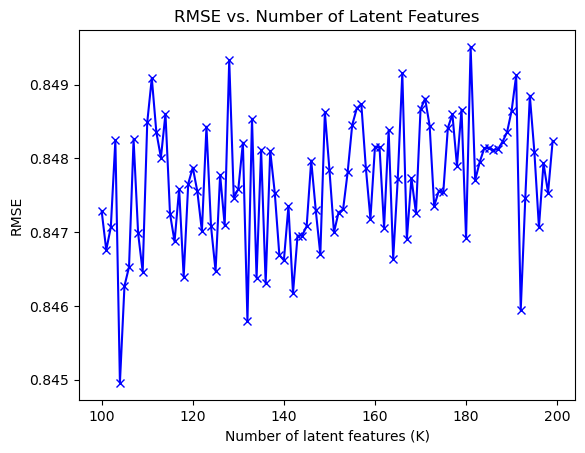

In [38]:
rmse_values=[]
k_values = range(100, 200)
for k in k_values:
    #print(k)
    iters=10
    predict= None
    for v in range(iters):

        train_df= sub_train.copy()[['userId','movieId', 'rating']]
        train_df.columns = ["u_id", "i_id", "rating"]
        eval_df= sub_eval.copy()[['userId','movieId', 'rating']]
        eval_df.columns = ["u_id", "i_id", "rating"]
        
        svd = SVD(lr=0.001, reg=0.005, n_epochs=100, n_factors=k,
            early_stopping=True, shuffle=False, min_rating=1, max_rating=5)

        svd.fit(X=train_df)
        if(predict is None):
            predict= np.array(svd.predict(eval_df))
        else:
            predict=predict+ np.array(svd.predict(eval_df))
    predict=predict/iters
    
    # Calculate the RMSE
    rmse = sqrt(mean_squared_error(predict, eval_df['rating']))
    rmse_values.append(rmse)

# Plot the RMSE values for different values of K
plt.plot(k_values, rmse_values, 'bx-')
plt.xlabel('Number of latent features (K)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Latent Features')
plt.show()